<a href="https://colab.research.google.com/github/ashref83/First/blob/master/Lendingbay_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [2]:
files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [3]:
files.upload()

Saving lending_club_info.csv to lending_club_info.csv


{'lending_club_info.csv': b'LoanStatNew,Description\r\nloan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."\r\nterm,The number of payments on the loan. Values are in months and can be either 36 or 60.\r\nint_rate,Interest Rate on the loan\r\ninstallment,The monthly payment owed by the borrower if the loan originates.\r\ngrade,LC assigned loan grade\r\nsub_grade,LC assigned loan subgrade\r\nemp_title,The job title supplied by the Borrower when applying for the loan.*\r\nemp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. \r\nhome_ownership,"The home ownership status provided by the borrower during registration\xc2\xa0or obtained from the credit report.\xc2\xa0Our values are: RENT, OWN, MORTGAGE, OTHER"\r\nannual_inc,The self-reported annual income provided by the borrow

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [10]:

df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [11]:
329.48*36

11861.28

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [0]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [0]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])



In [15]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


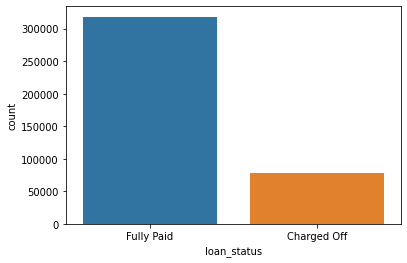

In [16]:
sns.countplot('loan_status',data=df)

In [0]:
df.drop(list(range(394029,396029)),inplace=True)

In [18]:
df.tail(2000)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
392030,27200.0,36 months,7.62,847.59,A,A3,Inventory Manager,7 years,MORTGAGE,118000.0,Verified,Mar-2014,Fully Paid,credit_card,Credit card refinancing,18.80,Mar-1992,10.0,0.0,27228.0,79.2,27.0,f,INDIVIDUAL,9.0,0.0,"602 James Glens Suite 793\nNew Amanda, AR 00813"
392031,5000.0,36 months,10.49,162.49,B,B3,Account Executive,2 years,RENT,43260.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,14.69,Oct-2005,13.0,0.0,8168.0,42.7,23.0,f,INDIVIDUAL,0.0,0.0,"12345 Joseph Lock\nHarrisonton, CA 00813"
392032,4000.0,36 months,10.36,129.75,B,B5,Ups,< 1 year,RENT,30000.0,Not Verified,Nov-2010,Fully Paid,other,Grego,24.00,Aug-2003,10.0,0.0,18787.0,81.0,22.0,f,INDIVIDUAL,NaN,0.0,Unit 8453 Box 7487\nDPO AP 70466
392033,14300.0,60 months,19.52,375.06,E,E2,Human Resources Manager,7 years,MORTGAGE,112200.0,Verified,Jul-2014,Fully Paid,debt_consolidation,Debt consolidation,10.43,May-1994,13.0,0.0,13301.0,68.0,49.0,w,INDIVIDUAL,8.0,0.0,USNS Parker\nFPO AA 05113
392034,16000.0,36 months,14.65,551.91,C,C2,Department of Justice_FBI,1 year,MORTGAGE,72000.0,Verified,Mar-2012,Fully Paid,debt_consolidation,Starting Over Loan,23.29,Sep-1998,11.0,0.0,18895.0,85.9,30.0,f,INDIVIDUAL,3.0,0.0,Unit 2223 Box 8563\nDPO AE 48052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394025,13025.0,36 months,16.55,461.47,D,D2,assistant Controller,8 years,RENT,64000.0,Not Verified,May-2015,Fully Paid,debt_consolidation,Debt consolidation,14.46,Jul-1998,6.0,0.0,4947.0,90.0,14.0,f,INDIVIDUAL,1.0,0.0,"7791 Diane Square\nJulianmouth, AK 00813"
394026,9600.0,36 months,15.31,334.25,C,C5,Instructional resource Coordinator,3 years,MORTGAGE,125000.0,Source Verified,Apr-2016,Fully Paid,debt_consolidation,Debt consolidation,20.00,Apr-1996,19.0,0.0,12113.0,55.8,44.0,w,INDIVIDUAL,3.0,0.0,"730 Veronica Isle Apt. 085\nLake Jennifer, OH ..."
394027,4500.0,36 months,17.27,161.05,C,C5,RR Donnelley,10+ years,RENT,33000.0,Not Verified,Dec-2012,Fully Paid,debt_consolidation,my lc loan,17.16,Mar-1997,8.0,0.0,6806.0,72.4,25.0,f,INDIVIDUAL,1.0,0.0,"16595 Cindy Villages\nWest Markberg, MS 00813"
394028,4000.0,36 months,18.99,146.61,E,E1,NaN,NaN,RENT,95743.0,Source Verified,Jun-2014,Fully Paid,medical,Medical expenses,21.81,Oct-1998,10.0,1.0,4210.0,20.3,35.0,f,INDIVIDUAL,3.0,1.0,"739 Robert Estate\nNorth Davidside, WI 05113"


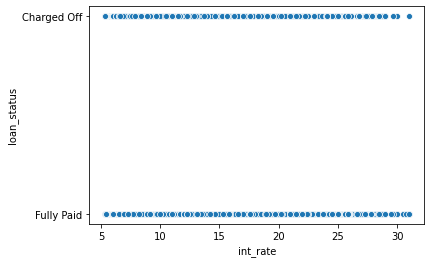

In [0]:
sns.scatterplot(x='int_rate',y='loan_status',data=df)

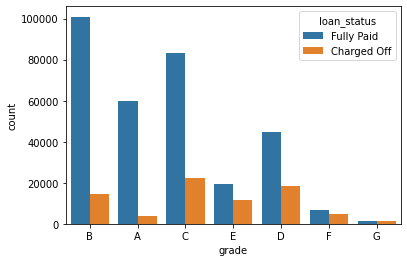

In [20]:
sns.countplot('grade',data=df,hue='loan_status')

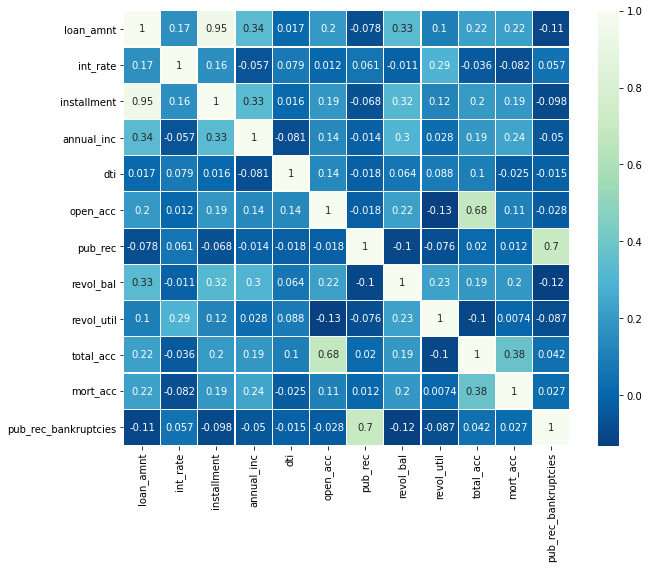

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='GnBu_r',linewidths=.2,annot=True)

In [22]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [23]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


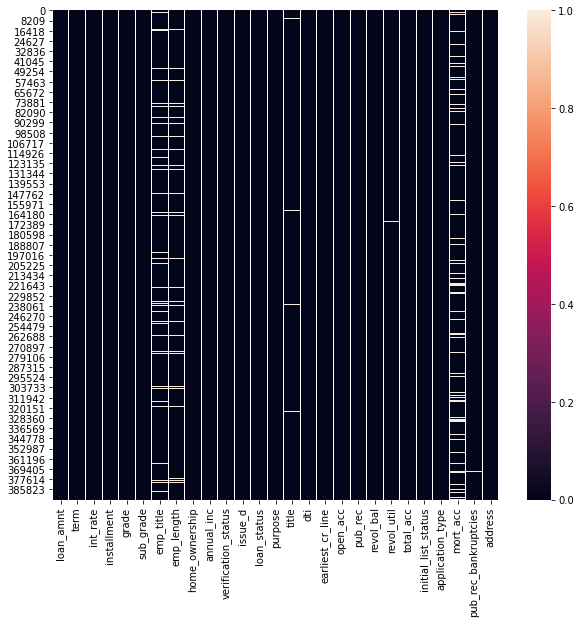

In [24]:
plt.figure(figsize=(10,9))
sns.heatmap(df.isna())

In [25]:
sum(df['emp_title'].isna())

22803

In [0]:
sum(js['mort_acc'].isna())

NameError: ignored

In [0]:
js=df[df['emp_title'].isna()==False]

In [0]:
plt.figure(figsize=(10,20))
sns.heatmap(js.isna())

In [0]:
sns.boxplot(x='emp_length',y='loan_amnt',data=df)

In [0]:
feat_info('title')

In [0]:
df['title'].nunique()

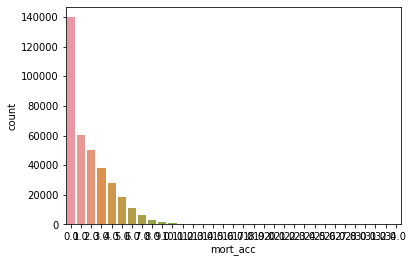

In [0]:
sns.countplot(x='mort_acc',data=df)

In [0]:
mdf=df
mdf.drop('mort_acc',axis=1,inplace=True)

In [0]:
mdf['term']=mdf['term'].apply(lambda x:float(x.split()[0]))

In [28]:
mdf['term']=mdf['term'].apply(lambda x:float(x.split()[0]))

AttributeError: ignored

In [30]:
mdf['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

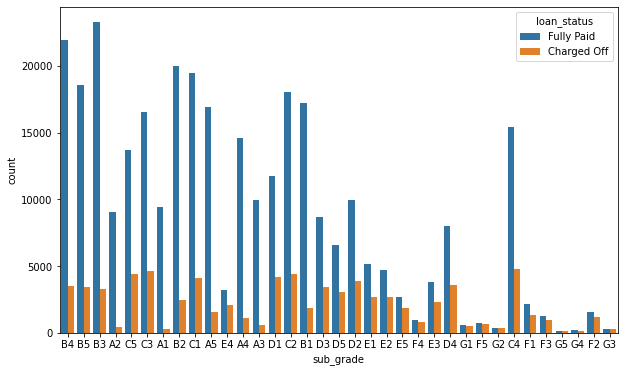

In [31]:
plt.figure(figsize=(10,6))
sns.countplot('sub_grade',data=df,hue='loan_status')

In [32]:
feat_info('sub_grade')

LC assigned loan subgrade


In [0]:
mdf.drop('sub_grade',inplace=True,axis=1)

In [0]:
grade = {'A':0.0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
def grade_chn(grd):
  return grade[grd]

In [0]:
mdf['grade']=mdf['grade'].apply(grade_chn)

In [36]:
mdf.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address
0,10000.0,36.0,11.44,329.48,1.0,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36.0,11.99,265.68,1.0,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36.0,10.49,506.97,1.0,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [37]:
mdf['emp_title'].nunique()

172413

In [0]:
mdf.drop('emp_title',axis=1,inplace=True)

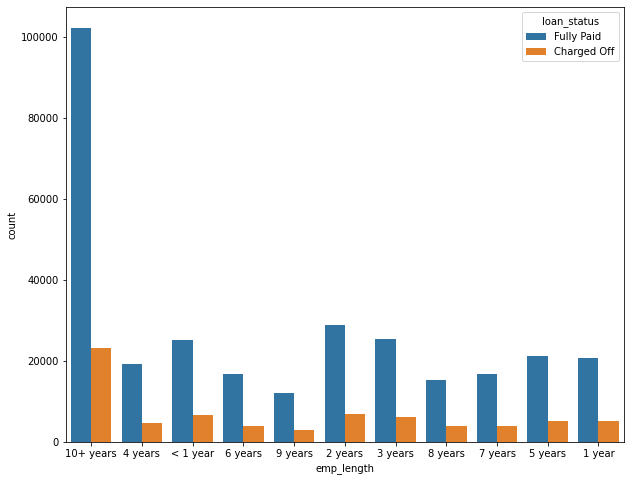

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='emp_length',data=mdf,hue='loan_status')

In [0]:
mdf['home_ownership'].nunique()

6

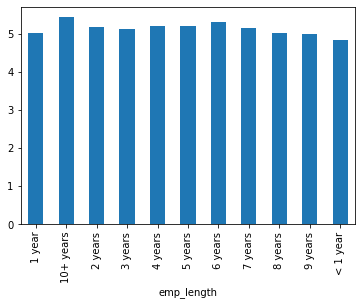

In [71]:
lns =pd.DataFrame(mdf.groupby('emp_length')['loan_status'].count())
lns['ratio']=lns['loan_status']/mdf[mdf['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()
#lns.reset_index(inplace=True)
lns['ratio'].plot(kind='bar')

In [0]:
del(lns)

In [73]:
mdf[mdf['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()

emp_length
1 year        5124
10+ years    23100
2 years       6898
3 years       6150
4 years       4592
5 years       5071
6 years       3919
7 years       4033
8 years       3808
9 years       3058
< 1 year      6528
Name: loan_status, dtype: int64

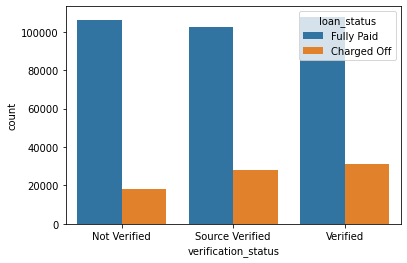

In [74]:
sns.countplot(x='verification_status',data=mdf,hue='loan_status')

In [75]:
mdf['issue_d'].nunique()

115

In [76]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


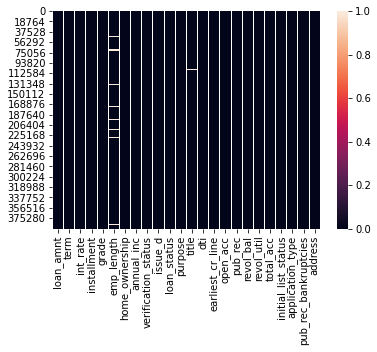

In [77]:
sns.heatmap(mdf.isna())

In [0]:
mdf.drop(['emp_length','title'],axis=1,inplace=True)

In [79]:
mdf.apply(lambda x:sum(x.isna()) )

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              274
total_acc                 0
initial_list_status       0
application_type          0
pub_rec_bankruptcies    531
address                   0
dtype: int64

In [0]:
mdf= mdf[mdf['revol_util'].isna()==False]

In [0]:
mdf= mdf[mdf['pub_rec_bankruptcies'].isna()==False]

In [82]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393225 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393225 non-null  float64
 1   term                  393225 non-null  float64
 2   int_rate              393225 non-null  float64
 3   installment           393225 non-null  float64
 4   grade                 393225 non-null  float64
 5   home_ownership        393225 non-null  object 
 6   annual_inc            393225 non-null  float64
 7   verification_status   393225 non-null  object 
 8   issue_d               393225 non-null  object 
 9   loan_status           393225 non-null  object 
 10  purpose               393225 non-null  object 
 11  dti                   393225 non-null  float64
 12  earliest_cr_line      393225 non-null  object 
 13  open_acc              393225 non-null  float64
 14  pub_rec               393225 non-null  float64
 15  

In [0]:
home_ownership = pd.get_dummies(mdf['home_ownership'],drop_first=True)

In [0]:
mdf.drop('home_ownership',axis=1,inplace=True)

In [0]:
home_ownership['OTHER']=home_ownership['NONE']+home_ownership['OTHER']

In [0]:
home_ownership.drop('NONE',axis=1,inplace=True)

In [0]:
mdf =pd.concat([mdf,home_ownership],axis=1)

In [0]:
dummy_d = pd.get_dummies(mdf['verification_status'],drop_first=True)

In [0]:
mdf=pd.concat([mdf,dummy_d],axis=1)

In [0]:
mdf.drop('verification_status',axis=1,inplace=True)

In [0]:
mdf.drop('issue_d',axis=1,inplace=True)

In [92]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [0]:
mdf.drop('earliest_cr_line',axis=1,inplace=True)

In [94]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [0]:
int_lst_status = pd.get_dummies(mdf['initial_list_status'],drop_first=True)

In [0]:
mdf=pd.concat([mdf,int_lst_status],axis=1)

In [97]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [98]:
mdf['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [0]:
dummy_d = pd.get_dummies(mdf['application_type'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('application_type',axis=1,inplace=True)


In [0]:
mdf.drop('initial_list_status',axis=1,inplace=True)


In [101]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393225 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393225 non-null  float64
 1   term                  393225 non-null  float64
 2   int_rate              393225 non-null  float64
 3   installment           393225 non-null  float64
 4   grade                 393225 non-null  float64
 5   annual_inc            393225 non-null  float64
 6   loan_status           393225 non-null  object 
 7   purpose               393225 non-null  object 
 8   dti                   393225 non-null  float64
 9   open_acc              393225 non-null  float64
 10  pub_rec               393225 non-null  float64
 11  revol_bal             393225 non-null  float64
 12  revol_util            393225 non-null  float64
 13  total_acc             393225 non-null  float64
 14  pub_rec_bankruptcies  393225 non-null  float64
 15  

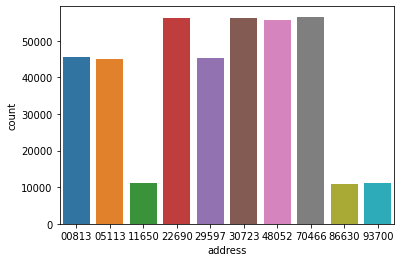

In [102]:
sns.countplot(mdf['address'].apply(lambda x: x.split()[-1]))

In [0]:
mdf['address']=mdf['address'].apply(lambda x: int(x.split()[-1]))

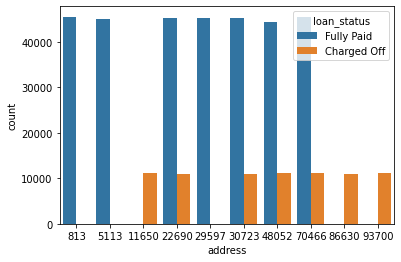

In [104]:
sns.countplot(x=mdf['address'],data=mdf,hue='loan_status')

In [105]:
mdf['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [0]:
dummy_d = pd.get_dummies(mdf['purpose'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('purpose',axis=1,inplace=True)

In [108]:
mdf.apply(lambda x:sum(x.isna()) )

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
annual_inc              0
loan_status             0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
address                 0
MORTGAGE                0
OTHER                   0
OWN                     0
RENT                    0
Source Verified         0
Verified                0
w                       0
INDIVIDUAL              0
JOINT                   0
credit_card             0
debt_consolidation      0
educational             0
home_improvement        0
house                   0
major_purchase          0
medical                 0
moving                  0
other                   0
renewable_energy        0
small_business          0
vacation                0
wedding                 0
dtype: int64

In [0]:
y = pd.get_dummies(mdf['loan_status'],drop_first=True)


In [110]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393225 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393225 non-null  float64
 1   term                  393225 non-null  float64
 2   int_rate              393225 non-null  float64
 3   installment           393225 non-null  float64
 4   grade                 393225 non-null  float64
 5   annual_inc            393225 non-null  float64
 6   loan_status           393225 non-null  object 
 7   dti                   393225 non-null  float64
 8   open_acc              393225 non-null  float64
 9   pub_rec               393225 non-null  float64
 10  revol_bal             393225 non-null  float64
 11  revol_util            393225 non-null  float64
 12  total_acc             393225 non-null  float64
 13  pub_rec_bankruptcies  393225 non-null  float64
 14  address               393225 non-null  int64  
 15  

In [111]:
y

,Fully Paid
0,1
1,1
2,1
3,1
4,0
...,...
394025,1
394026,1
394027,1
394028,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=mdf.drop('loan_status',axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101) 

In [0]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [0]:
X_train=scale.fit_transform(X_train)

In [0]:
X_test=scale.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [0]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(.2))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [143]:
model.fit(X_train,y_train.values,epochs=100,verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
9831/9831 [==============================] - 18s 2ms/step - loss: 0.2778 - val_loss: 0.2757
Epoch 2/100
9831/9831 [==============================] - 19s 2ms/step - loss: 0.2780 - val_loss: 0.2755
Epoch 3/100
9831/9831 [==============================] - 18s 2ms/step - loss: 0.2779 - val_loss: 0.2754
Epoch 4/100
9831/9831 [==============================] - 18s 2ms/step - loss: 0.2776 - val_loss: 0.2752
Epoch 5/100
9831/9831 [==============================] - 18s 2ms/step - loss: 0.2778 - val_loss: 0.2750
Epoch 6/100
9831/9831 [==============================] - 18s 2ms/step - loss: 0.2775 - val_loss: 0.2806
Epoch 7/100
9831/9831 [==============================] - 18s 2ms/step - loss: 0.2776 - val_loss: 0.2734
Epoch 8/100
9831/9831 [==============================] - 19s 2ms/step - loss: 0.2773 - val_loss: 0.2760
Epoch 9/100
9831/9831 [==============================] - 19s 2ms/step - loss: 0.2769 - val_loss: 0.2744
Epoch 10/100
9831/9831 [==============================] - 18s 2m

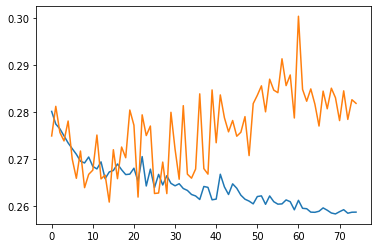

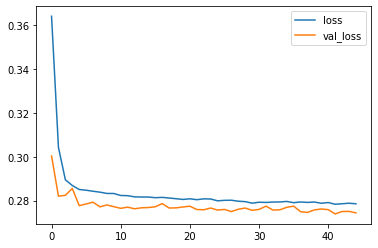

In [142]:
hist=pd.DataFrame(model.history.history)
hist.plot()

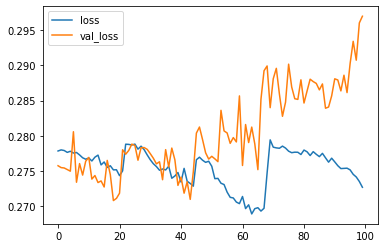

In [144]:
hist=pd.DataFrame(model.history.history)
hist.plot()

In [0]:
model = Sequential()

model.add(Dense(36,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(72,activation='relu'))
model.add(Dropout(.2))

model.add(Dense(18,activation='relu'))
model.add(Dropout(.2))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
stop=EarlyStopping(mode='min', monitor ='val_loss',patience=10,verbose=1)

In [151]:
model.fit(X_train,y_train.values,epochs=100,verbose=1,validation_data=(X_test,y_test),batch_size=256,callbacks=[stop])

Epoch 1/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.4121 - val_loss: 0.3644
Epoch 2/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.3691 - val_loss: 0.3602
Epoch 3/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.3560 - val_loss: 0.3240
Epoch 4/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.3079 - val_loss: 0.2837
Epoch 5/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.2898 - val_loss: 0.2794
Epoch 6/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.2868 - val_loss: 0.2794
Epoch 7/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.2846 - val_loss: 0.2791
Epoch 8/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.2834 - val_loss: 0.2779
Epoch 9/100
1229/1229 [==============================] - 3s 3ms/step - loss: 0.2824 - val_loss: 0.2777
Epoch 10/100
1229/1229 [==============================] - 3s 3ms/step - l

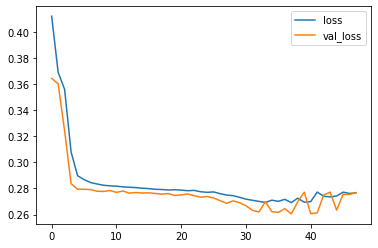

In [152]:
hist=pd.DataFrame(model.history.history)
hist.plot()

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('loarnfirstmodel.h5')

In [155]:
ls

lending_club_info.csv      loarnfirstmodel.h5
lending_club_loan_two.csv  sample_data/


In [0]:
files.download('loarnfirstmodel.h5')

In [209]:
def dumm_chng(variable,mdf):
  for x in variable:
    dummy_d = pd.get_dummies(mdf[x],drop_first=True)
    mdf=pd.concat([mdf,dummy_d],axis=1)
    mdf.drop(x,axis=1,inplace=True)

def feature_eng(mdf):
  mdf.drop(['emp_length','title','emp_title','mort_acc','sub_grade'],axis=1,inplace=True)

  hom_ownership = pd.get_dummies(mdf['home_ownership'],drop_first=True)
  columns = list(hom_ownership.columns)
  if 'NONE' in columns:
    if 'OTHER' in columns:
      hom_ownership['OTHER']=home_ownership['NONE']+home_ownership['OTHER']
      hom_ownership.drop('NONE',axis=1,inplace=True)
    else:
      hom_ownership['OTHER']=home_ownership['NONE']
      hom_ownership.drop('NONE',axis=1,inplace=True)    
    

  mdf =pd.concat([mdf,hom_ownership],axis=1)
  mdf.drop('home_ownership',axis=1,inplace=True)

  dumm_chng(['home_ownership','verification_status','initial_list_status','application_type','purpose'],mdf)

  return(mdf)


"""
dummy_d = pd.get_dummies(mdf['home_ownership'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('home_ownership',axis=1,inplace=True)

dummy_d = pd.get_dummies(mdf['verification_status'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('verification_status',axis=1,inplace=True)

dummy_d = pd.get_dummies(mdf['initial_list_status'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('initial_list_status',axis=1,inplace=True)

dummy_d = pd.get_dummies(mdf['application_type'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('application_type',axis=1,inplace=True)

dummy_d = pd.get_dummies(mdf['purpose'],drop_first=True)
mdf=pd.concat([mdf,dummy_d],axis=1)
mdf.drop('purpose',axis=1,inplace=True)"""

"\ndummy_d = pd.get_dummies(mdf['home_ownership'],drop_first=True)\nmdf=pd.concat([mdf,dummy_d],axis=1)\nmdf.drop('home_ownership',axis=1,inplace=True)\n\ndummy_d = pd.get_dummies(mdf['verification_status'],drop_first=True)\nmdf=pd.concat([mdf,dummy_d],axis=1)\nmdf.drop('verification_status',axis=1,inplace=True)\n\ndummy_d = pd.get_dummies(mdf['initial_list_status'],drop_first=True)\nmdf=pd.concat([mdf,dummy_d],axis=1)\nmdf.drop('initial_list_status',axis=1,inplace=True)\n\ndummy_d = pd.get_dummies(mdf['application_type'],drop_first=True)\nmdf=pd.concat([mdf,dummy_d],axis=1)\nmdf.drop('application_type',axis=1,inplace=True)\n\ndummy_d = pd.get_dummies(mdf['purpose'],drop_first=True)\nmdf=pd.concat([mdf,dummy_d],axis=1)\nmdf.drop('purpose',axis=1,inplace=True)"

In [0]:
ldf =df.tail(1000)

In [163]:
feature_eng(ldf)

KeyError: ignored

In [0]:
ldf=pd.read_csv('lending_club_loan_two.csv')
ldf=ldf.tail(1000)

In [211]:
ldf=feature_eng(ldf)

KeyError: ignored

KeyError: ignored